---
<h1> Análise e Segmentação de Consumidores "Fundo de Funil" </h1></span>

---

## 📋 Índice

* [🎯 Contextualização e Problemática](#contexto)
* [📊 Sobre o Dataset](#dataset)
* [📖 Dicionarização das Colunas](#dicionario)
* [⚙️ 0. Imports e Configs Globais](#imports)
* [🔍 1. Análise Exploratória de Dados (EDA)](#eda)
* [🧹 2. Pré-processamento de Dados](#pre-processamento)
* [🏗️ 3. Engenharia de Atributos](#engenharia)
* [🧐 4. Análise dos Atributos Criados](#analise-atributos)
* [📋 5. Preparação da Modelagem](#pre-modelagem)
* [🌳 6. Modelagem Usando um Classificador RandomForest](#random-forest)
* [📈 7. Modelagem Usando Regressão Logística](#regressao)
* [🔮 8. Análise dos Valores Preditos](#analise-preditos)
* [📊 9. Análise Gráfica dos Valores Preditos](#graficos-preditos)
* [💡 10. Insights](#insights)
* [🏁 11. Conclusão](#conclusao)

## 🎯 Contextualização e Problemática <a id="contexto"></a>

A problemática do presente projeto está relacionada à área de Marketing, mais especificamente à segmentação de consumidores.

Um dos fundamentos para qualquer empresa ou equipe que pretenda realizar uma campanha de marketing é a definição do público-alvo.

Apesar de a segmentação de consumidores baseada em dados ser extremamente importante, ainda há empresas que definem seu público-alvo com base apenas no “achismo”. Para empresas em fase inicial, o recomendado é realizar pesquisas de mercado a fim de compreender melhor o perfil de seus consumidores. 

Já para aquelas que já possuem histórico de vendas, é possível analisar os clientes que efetivamente compraram e, a partir disso, traçar um perfil mais preciso. É justamente nesse ponto que se concentra o presente projeto: identificar o perfil do cliente ideal que realiza a compra já na **primeira campanha**.

**E por que na primeira campanha?**

Quando os consumidores efetuam uma compra logo na primeira campanha, eles são classificados como estando no “fundo do funil”. Esse termo remete ao conceito de funil de marketing, ilustrado a seguir.

<img src="funil_de_marketing.webp"> (não esquecer de referenciar a imagem no projeto final)

O funil de marketing representa a jornada do cliente até o momento da compra. Esse funil pode, e deve, ser adaptado à realidade de cada empresa. Há produtos e serviços que exigem um maior nível de consciência sobre o problema enfrentado pelos clientes, enquanto outros demandam um nível menor.

Assim, os clientes que se encontram no fundo do funil já compreenderam que têm um problema e que precisam resolvê-lo. Nesse estágio, basta que tomem a ação necessária (a compra) para alcançar a solução.

No dataset a seguir, trabalhamos com produtos classificados como bens de consumo. Nesse contexto, o “problema” geralmente está associado a fatores como a necessidade de experimentar algo novo, o desejo de pertencimento a um grupo ou, ainda, necessidades básicas relacionadas à sobrevivência (alimentação, higiene etc.).

Não abordaremos aqui as motivações psicológicas ou emocionais que levam ao consumo, mas sim características demográficas. Ainda assim, tais características são extremamente importantes para a criação de campanhas assertivas, sejam elas online ou offline. Por isso, é fundamental diferenciarmos os conceitos de público-alvo e persona.

Estamos falando de público-alvo. O público-alvo corresponde a uma segmentação mais ampla e geral de consumidores, enquanto a persona é uma representação detalhada e individualizada do cliente ideal, englobando seus comportamentos, motivações e necessidades. Para se aprofundar mais nesse tema, recomendo o seguinte material: https://pingback.com/br/resources/diferenca-publico-alvo-e-persona/.


Feitas essas considerações, vamos avançar para o nosso projeto.

## 📊 Sobre o Dataset <a id="dataset"></a>

Trabalharemos com o Dataset: *Customer Personality Analysis*. Ele é um conjunto de dados da base do Kaggle com **2.240 registros** e **28 atributos** sobre clientes de uma empresa anônima. Ele foi originalmente disponibilizado por **Dr. Omar Romero-Hernandez** e é amplamente usado em projetos de **marketing analytics** e **ciência de dados**.

Para este estudo, focaremos em identificar o perfil dos clientes que realizaram uma compra já na primeira campanha de marketing. Para isso, utilizaremos as seguintes variáveis:

- Income: renda anual do domicílio do cliente
- Education: nível de escolaridade
- Marital_Status: estado civil
- Kidhome: número de crianças na residência
- Teenhome: número de adolescentes na residência
- Year_Birth: ano de nascimento do cliente
- AcceptedCmp1: indicador de aceitação da primeira campanha

Além dessas, criaremos novas variáveis durante o processo de análise e pré-processamento dos dados.

🔗 Fonte: [Kaggle - Customer Personality Analysis](https://www.kaggle.com/datasets/whenamancodes/customer-personality-analysis)

## 📖 Dicionarização das Colunas <a id="dicionario"></a>

### People
| Variável | Descrição |
| :--- | :--- |
| `ID` | Customer's unique identifier |
| `Year_Birth` | Customer's birth year |
| `Education` | Customer's education level |
| `Marital_Status` | Customer's marital status |
| `Income` | Customer's yearly household income |
| `Kidhome` | Number of children in customer's household |
| `Teenhome` | Number of teenagers in customer's household |
| `Dt_Customer` | Date of customer's enrollment with the company |
| `Recency` | Number of days since customer's last purchase |
| `Complain` | 1 if the customer complained in the last 2 years, 0 otherwise |

### Products
| Variável | Descrição |
| :--- | :--- |
| `MntWines` | Amount spent on wine in last 2 years |
| `MntFruits` | Amount spent on fruits in last 2 years |
| `MntMeatProducts`| Amount spent on meat in last 2 years |
| `MntFishProducts`| Amount spent on fish in last 2 years |
| `MntSweetProducts`| Amount spent on sweets in last 2 years |
| `MntGoldProds` | Amount spent on gold in last 2 years |

### Promotion
| Variável | Descrição |
| :--- | :--- |
| `NumDealsPurchases`| Number of purchases made with a discount |
| `AcceptedCmp1` | 1 if customer accepted the offer in the 1st campaign, 0 otherwise |
| `AcceptedCmp2` | 1 if customer accepted the offer in the 2nd campaign, 0 otherwise |
| `AcceptedCmp3` | 1 if customer accepted the offer in the 3rd campaign, 0 otherwise |
| `AcceptedCmp4` | 1 if customer accepted the offer in the 4th campaign, 0 otherwise |
| `AcceptedCmp5` | 1 if customer accepted the offer in the 5th campaign, 0 otherwise |
| `Response` | 1 if customer accepted the offer in the last campaign, 0 otherwise |

### Place
| Variável | Descrição |
| :--- | :--- |
| `NumWebPurchases` | Number of purchases made through the company’s website |
| `NumCatalogPurchases`| Number of purchases made using a catalogue |
| `NumStorePurchases`| Number of purchases made directly in stores |
| `NumWebVisitsMonth`| Number of visits to company’s website in the last month |


## ⚙️ 0. Imports e Configs Globais <a id="imports"></a>

Iniciamos importando as bibliotecas necessárias e definindo algumas configurações globais para o projeto.

In [1]:
# IMPORTS

# Buil-in libs
from datetime import date

# Thid-party libs
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# CONFIGS GLOBAIS

pd.set_option('display.max_columns', 30)
pd.set_option('display.max_rows', 10)
sns.set(style="whitegrid")

In [3]:
# FAZENDO DOWNLOAD DO DATASET
import kagglehub

path = kagglehub.dataset_download("whenamancodes/customer-personality-analysis")
print("Dataset disponível em:", path)

Dataset disponível em: C:\Users\User\.cache\kagglehub\datasets\whenamancodes\customer-personality-analysis\versions\1


In [4]:
# LENDO O DATASET
df = pd.read_csv(path + "/marketing_campaign.csv", sep="\t")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


## 🔍 1. Análise Exploratória de Dados (EDA) <a id="eda"></a>

In [5]:
# VERIFICANDO AS DIMENSÕES DO DATASET
print(f"Nº de linhas: {df.shape[0]}")
print(f"Nº de colunas: {df.shape[1]}")

Nº de linhas: 2240
Nº de colunas: 29


In [6]:
# TIPOS DE DADOS E VALORES NULOS
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Vamos plotar um gráfico boxplot de algumas colunas para entender a distribuição dos dados.

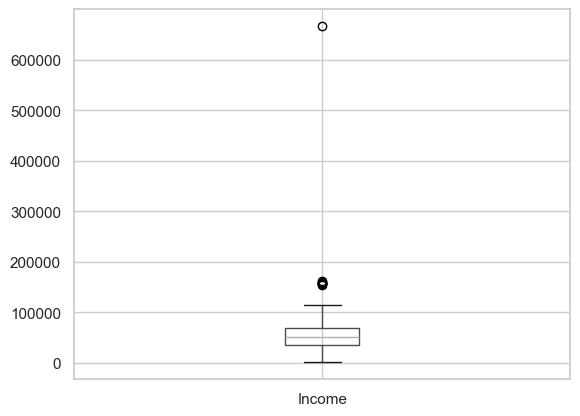

In [7]:
df.boxplot(column='Income')
plt.show()

Encontramos alguns outliers; um deles passa de 600 mil de renda. Vamos lembrar de removê-lo depois, na etapa de pré-processamento. Continuando a análise:

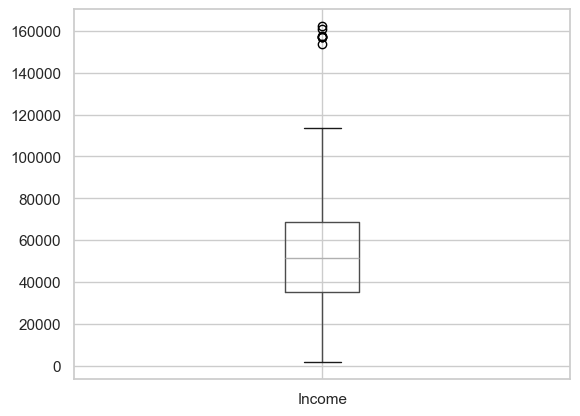

In [8]:
df[df['Income'] <= 600000].boxplot(column='Income')
plt.show()

Há ainda outliers remanescentes. Vamos analisá-los:

In [9]:
# Selecionando oo grupo de outliers remanescentes
df[df['Income'] <= 600000][df[df['Income'] <= 600000]["Income"] > 140000]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
164,8475,1973,PhD,Married,157243.0,0,1,01-03-2014,98,20,2,1582,1,2,1,15,0,22,0,0,0,0,0,0,0,0,3,11,0
617,1503,1976,PhD,Together,162397.0,1,1,03-06-2013,31,85,1,16,2,1,2,0,0,0,1,1,0,0,0,0,0,0,3,11,0
655,5555,1975,Graduation,Divorced,153924.0,0,0,07-02-2014,81,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,3,11,0
687,1501,1982,PhD,Married,160803.0,0,0,04-08-2012,21,55,16,1622,17,3,4,15,0,28,1,0,0,0,0,0,0,0,3,11,0
1300,5336,1971,Master,Together,157733.0,1,0,04-06-2013,37,39,1,9,2,0,8,0,1,0,1,1,0,0,0,0,0,0,3,11,0
1653,4931,1977,Graduation,Together,157146.0,0,0,29-04-2013,13,1,0,1725,2,1,1,0,0,28,0,1,0,0,0,0,0,0,3,11,0
2132,11181,1949,PhD,Married,156924.0,0,0,29-08-2013,85,2,1,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,3,11,0


Talvez esses números não sejam outliers, especialmente se considerarmos variáveis como idade (pessoas mais velhas podem ter renda maior) e nível educacional (muitos possuem pós-graduação). Em um cenário real, seria possível validar com outras áreas da empresa se esses registros de fato deveriam ser tratados como outliers ou não. Aquim irei considerar que não são outliers.

Vamos agora analisar a distribuição de variáveis como quantidade de crianças e adolescentes na casa:

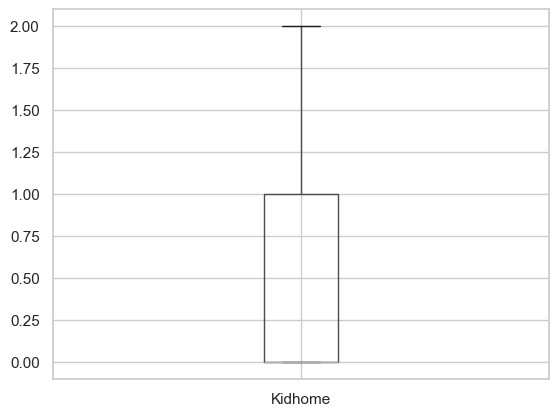

In [10]:
df.boxplot(column='Kidhome')
plt.show()

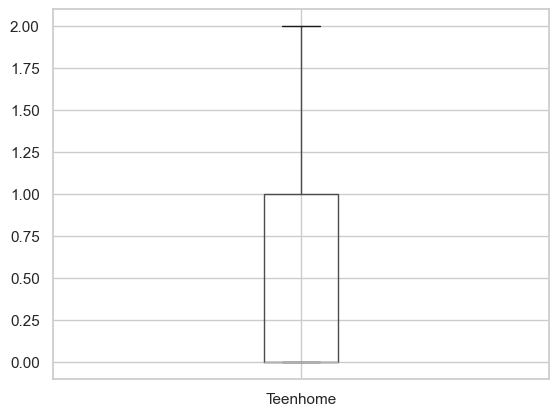

In [11]:
df.boxplot(column='Teenhome')
plt.show()

Variável Kidhome e Teenhome não possuem outliers. O que é positivo!

Vejamos agora a correlação entre a renda (Income) e as variáveis Kidhome e Teenhome.

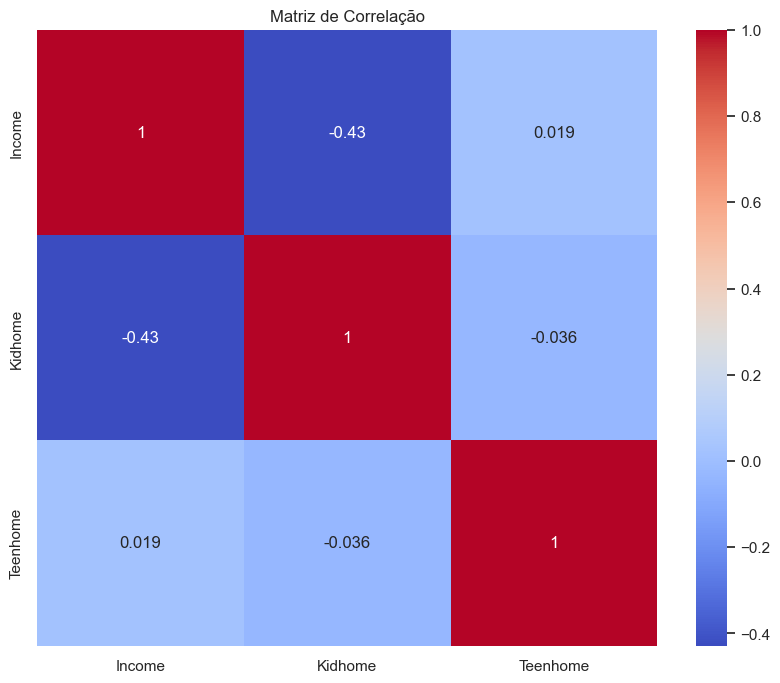

In [12]:
# Exemplo de heatmap de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(df[['Income', 'Kidhome', 'Teenhome']].corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

Aparentemente, a maior correlação é a de Income com Kidhome, sendo ela negativa. Vejamos agora a distribuição da nossa variável alvo (target):

In [13]:
# Analisando a variável alvo
df.groupby(["AcceptedCmp1"]).size()

AcceptedCmp1
0    2096
1     144
dtype: int64

As classes estão desbalanceadas. 1 significa quem comprou na primeira campanha e 0 quem não comprou. Temos uma amostra muito pequena daqueles que compraram (1) diante de quem não comprou. Mais adiante iremos buscar alternativas para contornar essa situação.

## 🧹 2. Pré-processamento de Dados <a id="pre-processamento"></a>

Conforme já detectado na etapa de EDA, há um outlier na variável Income que precisa ser removido. Vamos fazer isso agora.

In [14]:
# Removendo outlier na variável Income
outlier_threshold = 600000
df = df[df['Income'] <= outlier_threshold]
df.reset_index(drop=True, inplace=True)

In [15]:
# Verificando se há dados null/missing
df.isnull().sum()

ID                0
Year_Birth        0
Education         0
Marital_Status    0
Income            0
                 ..
AcceptedCmp2      0
Complain          0
Z_CostContact     0
Z_Revenue         0
Response          0
Length: 29, dtype: int64

In [16]:
# Removendo as linhas onde havia valor missing
df.dropna(subset=['Income'], inplace=True)

In [17]:
# Resetando índice das colunas para não ter problemas após o tratamento de dados
df = df.reset_index()

## 🏗️ 3. Engenharia de Atributos <a id="engenharia"></a>

Podemos verificar que no dataset há variáveis que explicam o comportamento APÓS o consumo. No momento, essas variáveis não são de interesse para nós. Vamos manter apenas as variáveis ANTERIORES ao consumo, que são: Education, Marital_Status, Income, Kidhome, Teenhome, Year_Birth e AcceptedCmp1 (target).

In [18]:
# Copiando o DataFrame para, em seguida, selecionar as colunas que queremos
df_first_purchase = df.copy()
df_first_purchase = df_first_purchase[["Income", "Education", "Marital_Status", "Kidhome", "Teenhome", "Year_Birth", "AcceptedCmp1"]]

In [19]:
#Transformando o ano de nascimento (Year_Birth) em idade (age) e removendo a coluna Year_Birth
df_first_purchase["age"] = date.today().year - df_first_purchase["Year_Birth"]
df_first_purchase.drop(columns=['Year_Birth'], inplace=True)
df_first_purchase.head()

,Income,Education,Marital_Status,Kidhome,Teenhome,AcceptedCmp1,age
0,58138.0,Graduation,Single,0,0,0,68
1,46344.0,Graduation,Single,1,1,0,71
2,71613.0,Graduation,Together,0,0,0,60
3,26646.0,Graduation,Together,1,0,0,41
4,58293.0,PhD,Married,1,0,0,44


## 🧐 4. Análise dos Atributos Criados <a id="analise-atributos"></a>

Vamos fazer uma análise exploratória para entender o dados da variável "age" que acabamos de criar:

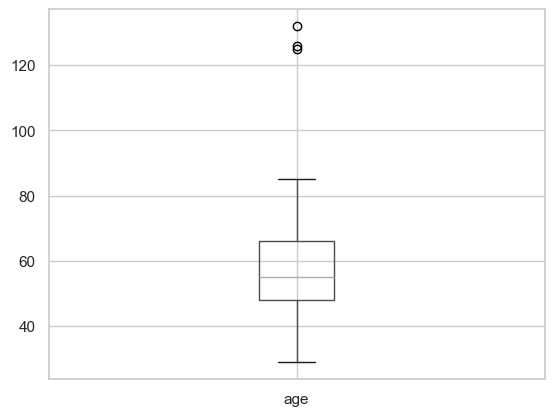

In [20]:
df_first_purchase.boxplot(column='age')
plt.show()

Podemos verificar que há alguns registros com pessoas acima de 120 anos, configurando claramente outliers. Vamos realizar a remoção deles.

In [21]:
# Removendo outliers da variável age
outliers_age = (df_first_purchase[df_first_purchase["age"] > 120]).index
df_first_purchase.drop(index=outliers_age, inplace=True)

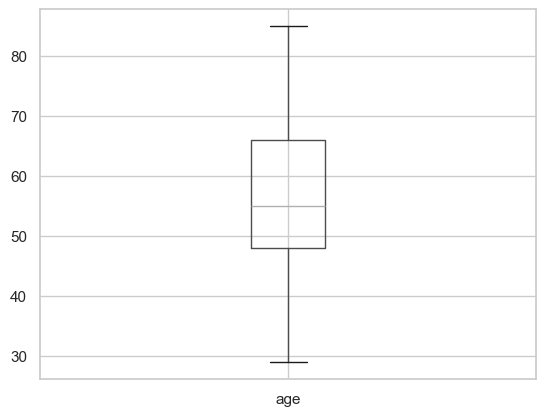

In [22]:
# Plotando o boxplot da variável age sem os outliers e resetando o índice
df_first_purchase.boxplot(column='age')
df_first_purchase = df_first_purchase.reset_index()
df_first_purchase.drop('index', axis=1, inplace=True)
plt.show()

Tudo certo!

## 📋 5. Preparação da Modelagem <a id="pre-modelagem"></a>

Nesta etapa, definimos as variáveis `X` (features) e `y` (target) a partir do DataFrame `df_first_purchase`. Além disso, transformaremos variáveis categóricas em numéricas, aplicaremos dummies e realizaremos a separação entre dados de treino e teste.

In [23]:
# Definindo X para as variáveis features e y para a variável target
X = df_first_purchase.drop('AcceptedCmp1', axis=1)
y = df_first_purchase["AcceptedCmp1"]

In [24]:
# Mapeando a variável Education para valores numéricos
replace_education = {
    'Basic': 0,
    'Graduation': 1,
    '2n Cycle': 2,
    'Master': 3,
    'PhD': 4
}
X['Education'] = X['Education'].replace(replace_education)

C:\Users\User\AppData\Local\Temp\ipykernel_14360\2296340474.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['Education'] = X['Education'].replace(replace_education)


In [25]:
# Transformando variáveis categóricas em dummies
# Necessário pois o algoritmo DecisionTreeClassifier "não entende" variáveis categóricas
X_encoded = pd.get_dummies(X, drop_first=True)
X_encoded

,Income,Education,Kidhome,Teenhome,age,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,58138.0,1,0,0,68,False,False,False,True,False,False,False
1,46344.0,1,1,1,71,False,False,False,True,False,False,False
2,71613.0,1,0,0,60,False,False,False,False,True,False,False
3,26646.0,1,1,0,41,False,False,False,False,True,False,False
4,58293.0,4,1,0,44,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2207,61223.0,1,0,1,58,False,False,True,False,False,False,False
2208,64014.0,4,2,1,79,False,False,False,False,True,False,False
2209,56981.0,1,0,0,44,False,True,False,False,False,False,False
2210,69245.0,3,0,1,69,False,False,False,False,True,False,False


In [26]:
# Separação entre treino e teste
# O parâmetro "stratify" mantém a proporção original das classes, importante em casos desbalanceados
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.20, random_state=42, stratify=y
)

Nesta célula já foi adicionado o SMOTE, que busca aumentar a população da classe minoritária de forma sintética.

In [27]:
# SMOTE aumenta sinteticamente a população da classe minoritária
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

**Observação:**  

No início do projeto, considerei utilizar o modelo `DecisionTreeClassifier` para identificar padrões entre perfis de clientes ideais, interpretando os nós, folhas e o peso de cada variável no modelo.  

Porém, os resultados não foram satisfatórios, principalmente devido ao desbalanceamento das classes. Por isso, optei por modelos mais robustos, como `RandomForestClassifier`, que apresentaram desempenho semelhante ou melhor, sem a necessidade de detalhar tanto a árvore.  

O objetivo final continua sendo identificar **o perfil de cliente que compra na primeira campanha**.

## 🌳 6. Modelagem Usando um Classificador RandomForest <a id="random-forest"></a>

Nesta etapa, instanciamos o modelo **Random Forest**, ajustando seus principais hiperparâmetros e tratando o desbalanceamento de classes tanto por **class_weight** quanto pelo **SMOTE**. Em seguida, treinamos o modelo nas duas versões da base (original e balanceada) para comparar o desempenho.

In [28]:
# Instanciando e definindo os parâmetros do modelo RandomForest
arvore = RandomForestClassifier(
    class_weight={0:1, 1:12},   # Ajuste de peso para lidar com classes desbalanceadas
    n_estimators=2000,          # Número de árvores na floresta
    max_depth=5,                # Profundidade máxima de cada árvore
    random_state=42
)

# Treinando o modelo com os dados originais
arvore.fit(X_train, y_train)
y_pred = arvore.predict(X_test)

# Treinando o modelo com os dados balanceados pelo SMOTE
arvore.fit(X_resampled, y_resampled)
y_pred_resampled = arvore.predict(X_test)

Inicialmente, testei estratégias como `class_weight='balanced'`, mas obtive melhores resultados ao definir manualmente os pesos das classes: 1 para a classe 0 e 12 para a classe 1. Essa configuração se mostrou a mais eficaz para lidar com o desbalanceamento.

O parâmetro `n_estimators`, que define a quantidade de árvores geradas pelo modelo, foi configurado em 2000. Aumentar esse valor além disso não trouxe melhorias significativas. Em projetos com datasets maiores, valores muito altos podem impactar o consumo de memória; contudo, no nosso caso, o volume de dados permitiu essa configuração sem problemas.

O `max_depth=5` foi o que apresentou melhor desempenho. Testei também alternativas como `min_samples_leaf`, mas elas aumentaram consideravelmente o risco de overfitting, reduzindo a capacidade de generalização do modelo.

A seguir, definimos uma função que exibe a matriz de confusão e o relatório de classificação de forma clara, incluindo acurácia.  
Essa função permite comparar facilmente os resultados do modelo treinado com o dataset original e com o dataset balanceado pelo SMOTE.

In [29]:
# Definição da função para apresentar a matriz de confusão e o relatório de classificação
def show_result(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    print("Matriz de Confusão:")
    print(f"{'':<20}{'Previsto: 0':<15}{'Previsto: 1'}")
    print(f"{'Real: 0':<20}(TN){cm[0][0]:<15}  (FP){cm[0][1]}")
    print(f"{'Real: 1':<20}(FN){cm[1][0]:<15}  (TP){cm[1][1]}")
    print("______________________________________________________")
    print(classification_report(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))

In [30]:
# Resultados do modelo com o dataset original
print("--- Resultados do Modelo Original com Class Weight ---")
show_result(y_test, y_pred)


--- Resultados do Modelo Original com Class Weight ---
Matriz de Confusão:
                    Previsto: 0    Previsto: 1
Real: 0             (TN)377              (FP)38
Real: 1             (FN)7                (TP)21
______________________________________________________
              precision    recall  f1-score   support

           0       0.98      0.91      0.94       415
           1       0.36      0.75      0.48        28

    accuracy                           0.90       443
   macro avg       0.67      0.83      0.71       443
weighted avg       0.94      0.90      0.91       443

Accuracy: 0.8984198645598194


In [31]:
# Resultados do modelo com o dataset balanceado pelo SMOTE
print("\n--- Resultados do Modelo com Dados Balanceados (SMOTE) ---")
show_result(y_test, y_pred_resampled)


--- Resultados do Modelo com Dados Balanceados (SMOTE) ---
Matriz de Confusão:
                    Previsto: 0    Previsto: 1
Real: 0             (TN)273              (FP)142
Real: 1             (FN)4                (TP)24
______________________________________________________
              precision    recall  f1-score   support

           0       0.99      0.66      0.79       415
           1       0.14      0.86      0.25        28

    accuracy                           0.67       443
   macro avg       0.57      0.76      0.52       443
weighted avg       0.93      0.67      0.75       443

Accuracy: 0.6704288939051919


Como podemos observar, o uso do SMOTE aumentou levemente os verdadeiros positivos (TP), mas houve uma piora significativa nos verdadeiros negativos (TN).  

Portanto, seguir por esse caminho não se mostra vantajoso. Precisaremos explorar modelos que lidem melhor com o desbalanceamento ou que sejam mais eficientes na imputação de dados da classe minoritária.  

Dessa forma, a próxima etapa será aplicar a Regressão Logística.

## 📈 7. Modelagem Usando Regressão Logística <a id="regressao"></a>

Partamos agora para a modelagem usando regressão logística.

In [32]:
# Cópia dos dados para não alterar o original
X_lr = X.copy()
y_lr = y.copy()

# One-hot encoding da variável categórica
X_encoded = pd.get_dummies(X_lr, drop_first=True)

# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_lr, test_size=0.2, random_state=42, stratify=y_lr
)

In [33]:
#Realizando SMOTE
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [34]:
# Separação numéricas e categóricas
num_features = X_encoded.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_features = X_encoded.select_dtypes(include=["object", "category", "bool"]).columns.tolist()

# Escalonador
scaler = StandardScaler()
scaler_resampled = StandardScaler()
# Train
X_train_num = pd.DataFrame(
    scaler.fit_transform(X_train[num_features]), columns=num_features
)
X_train_cat = X_train[cat_features].reset_index(drop=True)
X_train_scaled = pd.concat([X_train_num, X_train_cat], axis=1)

# Test
X_test_num = pd.DataFrame(
    scaler.transform(X_test[num_features]), columns=num_features
)
X_test_cat = X_test[cat_features].reset_index(drop=True)
X_test_scaled = pd.concat([X_test_num, X_test_cat], axis=1)

In [35]:
# Resampled (treino balanceado)
X_resampled_num = pd.DataFrame(
    scaler_resampled.fit_transform(X_resampled[num_features]), columns=num_features
)
X_resampled_cat = X_resampled[cat_features].reset_index(drop=True)
X_resampled_scaled = pd.concat([X_resampled_num, X_resampled_cat], axis=1)

# Reset dos índices de y
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [36]:
# Modelos
logreg = LogisticRegression(
    class_weight={0: 1, 1: 8}, max_iter=600, random_state=42
)
logreg_smote = LogisticRegression(
    class_weight="balanced", max_iter=600, random_state=42
)

# Treino
logreg.fit(X_train_scaled, y_train)
y_pred = logreg.predict(X_test_scaled)

logreg_smote.fit(X_resampled_scaled, y_resampled)
y_pred_resampled = logreg_smote.predict(X_test_scaled)

In [37]:
print("\n--- Resultados do Modelo Original com Class Weight ---")
show_result(y_test, y_pred)


--- Resultados do Modelo Original com Class Weight ---
Matriz de Confusão:
                    Previsto: 0    Previsto: 1
Real: 0             (TN)374              (FP)41
Real: 1             (FN)8                (TP)20
______________________________________________________
              precision    recall  f1-score   support

           0       0.98      0.90      0.94       415
           1       0.33      0.71      0.45        28

    accuracy                           0.89       443
   macro avg       0.65      0.81      0.69       443
weighted avg       0.94      0.89      0.91       443

Accuracy: 0.8893905191873589


In [38]:
print("\n--- Resultados do Modelo com Dados Balanceados (SMOTE) ---")
show_result(y_test, y_pred_resampled)


--- Resultados do Modelo com Dados Balanceados (SMOTE) ---
Matriz de Confusão:
                    Previsto: 0    Previsto: 1
Real: 0             (TN)331              (FP)84
Real: 1             (FN)6                (TP)22
______________________________________________________
              precision    recall  f1-score   support

           0       0.98      0.80      0.88       415
           1       0.21      0.79      0.33        28

    accuracy                           0.80       443
   macro avg       0.59      0.79      0.60       443
weighted avg       0.93      0.80      0.85       443

Accuracy: 0.7968397291196389


Como podemos ver, novamente o modelo que treinamos com SMOTE teve piores resultados do que com o dataframe desbalanceado. Assim sendo, a imputação de dados não foi uma alternativa viável. 

A regressão logística teve resultados um pouco piores que a RandomForest, 3% à menos de Precision na classe 1 (Comprou), já no Recall teve uma piora de 4%. Na classe 0 tivemos uma queda do Recall de 1%.

Porém, de acordo com o nosso problema, sabemos que a Regressão Logística pode nos esclarecer mais do que a Random Forest, pela sua capacidade de interpretabilidade a partir dos coeficientes.


## 🔮 8. Análise dos Valores Preditos <a id="analise-preditos"></a>

Agora com nosso modelo, treinado, vamos realizar uma análise exploratória dos resultados da matriz de confusão. Mas por quê vamos fazer essa análise? 

Por 2 motivos:

1 - Essa análise vai responder a nossa pergunta inicial de: Qual o perfil de cliente ideal?
    Porém, como vai responder isso? A partir do padrão que ela encontrou para definir os True Positives. Além de termos um modelo que vai trazer a predição dos dados futuros, precisamos definir o perfil desse público que já temos em mãos para poder ajudar na tomada de decisão do time de marketing, mostrando como devem segmentar as campanhas online ou offline.  

2 - Além de responder nossa pergunta inicial, também será possível entender como o modelo se comportou e como ele atribuiu os resultados da forma que atribuiu.

Começaremos entendendo o coeficiente das variáveis e como cada uma impactou no cálculo da probabilidade.

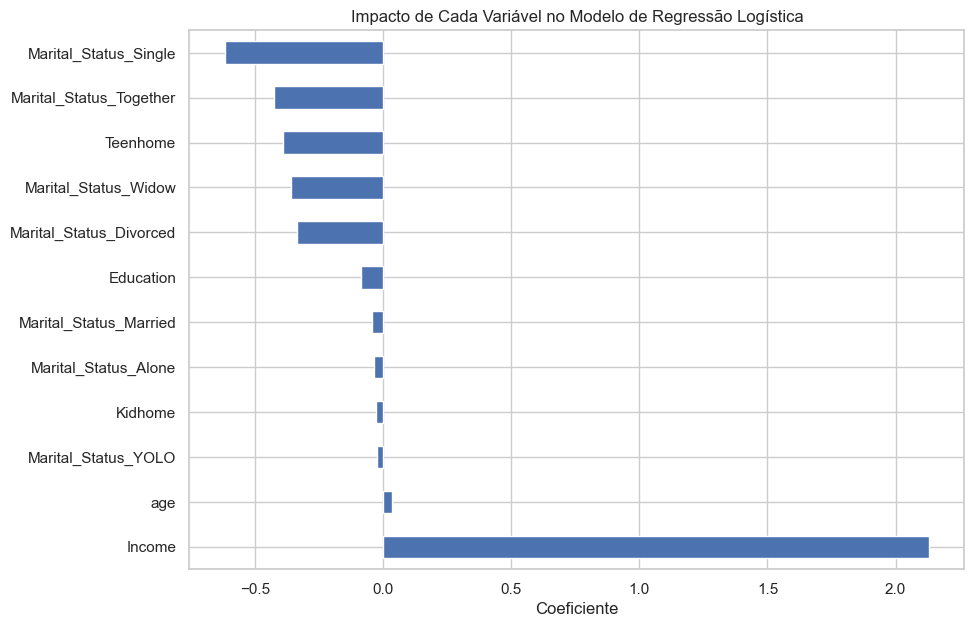

In [39]:
# Série com coeficientes da Regressão Logística
coef = pd.Series(logreg.coef_[0], index=X_train_scaled.columns)
coef_sorted = coef.sort_values(ascending=False)

# Visualização
plt.figure(figsize=(10, 7))
coef_sorted.plot(kind='barh')
plt.title('Impacto de Cada Variável no Modelo de Regressão Logística')
plt.xlabel('Coeficiente')
plt.show()

Como podemos ver, o coeficiente que mais impacta o modelo positivamente é o "Income", ele tem um impacto MUITO significativo. A outras variáveis, com exceção da "Age", impactam de forma de negativa, algumas mais que outras.

Para fazer análise exploratória, precisamos fazer uma cópia das features que foram usadas no modelo, adicionar no dataframe os valores da target e adicionar os valores que o modelo previu.

In [40]:
# Usando as predições do modelo treinado com SMOTE
y_pred_final = y_pred

# Fazendo cópia das features usadas para testar o modelo, dos valores reais e dos valores preditos.
df_exploration = X_test_scaled.copy()
df_exploration["y_true"] = y_test
df_exploration["y_pred"] = y_pred_final

Ás variáveis estão escalonadas, então precisamos trazer elas ao normal para ser possível visualizar os dados de forma fidedigna.

In [41]:
# Dicionário do type de cada variável
feature_types = {
    "Income": "float",
    "Education": "int",
    "Kidhome": "int",
    "Teenhome": "int",
    "age": "int"
}
# Fazendo o "descalonamento" das variáveis para poder analisar os resultados
other_features = df_exploration[["Marital_Status_Alone",	"Marital_Status_Divorced",	"Marital_Status_Married",	"Marital_Status_Single",	"Marital_Status_Together",	"Marital_Status_Widow",	"Marital_Status_YOLO",	"y_true",	"y_pred"]]
nums_desescaled = pd.DataFrame(scaler.inverse_transform(df_exploration[['Income', 'Education', 'Kidhome', 'Teenhome', 'age']]), columns=['Income', 'Education', 'Kidhome', 'Teenhome', 'age'])
nums_desescaled = nums_desescaled.astype(feature_types)
df_exploration_desescaled = pd.concat([nums_desescaled, other_features], axis=1)
df_exploration_desescaled = df_exploration_desescaled.reset_index(drop=True)

Criando dataframes para cada caso da matriz de confusão:

In [42]:
# Criando variáveis que representam a nossa matriz de confusão.
false_positive = df_exploration_desescaled[(df_exploration_desescaled["y_true"] == 0) & (df_exploration_desescaled["y_pred"] == 1)]
false_negative = df_exploration_desescaled[(df_exploration_desescaled["y_true"] == 1) & (df_exploration_desescaled["y_pred"] == 0)]
true_positive = df_exploration_desescaled[(df_exploration_desescaled["y_true"] == 1) & (df_exploration_desescaled["y_pred"] == 1)]
true_negative = df_exploration_desescaled[(df_exploration_desescaled["y_true"] == 0) & (df_exploration_desescaled["y_pred"] == 0)]

#false_positive.drop(columns=["y_true", "y_pred"], inplace=True)
#false_negative.drop(columns=["y_true", "y_pred"], inplace=True)
#true_positive.drop(columns=["y_true", "y_pred"], inplace=True)
#true_negative.drop(columns=["y_true", "y_pred"], inplace=True)

Agora que separamos às variáveis, vamos efetivamente começar a análise. Começaremos entendendo os falsos negativos.

## 📊 9. Análise Gráfica dos Valores Preditos <a id="graficos-preditos"></a>

In [43]:
# TODO: MODULARIZAR E AJEITAR AS FUNCAO DOS GRAFICOS. PEDIR AJUDA DO CHAT GPT. ESTA MUITO FEIO O CODIGO. Aproveitar elementos em comum.

Vamos começar criando uma função capaz de plotar os gráficos de barras de "Kidhome", "Teenhome" e "Education".

In [44]:
# Vamos colocar em tuplas os objetos para conseguir plotar todos os valores em 4 gráficos na mesma grid
dfs = [
    (false_negative,      "Falsos Negativos"),
    (false_positive,      "Falsos Positivos"),
    (true_negative, "Verdadeiros Negativos"),
    (true_positive, "Verdadeiros Positivos"),
]

In [45]:
def plot_confusion_distributions(
    dfs,                      # lista de tuplas: [(df, "Título"), ...]
    x_col,                    # nome da coluna OU lista de colunas (para dummies)
    x_label,                  # rótulo do eixo X
    suptitle,                 # título geral da figura
    plot_type="countplot",    # "countplot", "histplot" ou "bar_dummy"
    map_labels=None,          # dicionário opcional para mapear valores
    bin_size=None,            # usado se plot_type="histplot"
    palette="magma",
    figsize=(16, 8),
    title_fontsize=12,
    title_weight="bold",
    suptitle_fontsize=16,
    rotate_x=0,
):
    """Plota distribuições categóricas, contínuas ou de variáveis dummificadas em grid."""
    sns.set(style="whitegrid")

    # calcula layout automático (quadrado aproximado)
    n_plots = len(dfs)
    ncols = int(n_plots**0.5)
    nrows = -(-n_plots // ncols)  # ceil

    cores = sns.color_palette(palette, n_colors=n_plots)
    fig, axes = plt.subplots(nrows, ncols, figsize=figsize)
    axes = axes.flatten()

    for i, (df_i, titulo) in enumerate(dfs):
        ax = axes[i]

        if plot_type == "countplot":
            data = df_i[x_col].map(map_labels) if map_labels else df_i[x_col]
            sns.countplot(x=data, color=cores[i], ax=ax)

            for c in ax.containers:
                ax.bar_label(c, fmt='%d', padding=5)

        elif plot_type == "histplot":
            data = df_i[x_col]
            bins = range(int(data.min()), int(data.max()) + bin_size, bin_size) if bin_size else "auto"
            sns.histplot(data, bins=bins, kde=False, color=cores[i],
                         edgecolor="black", ax=ax)
            if bin_size:
                ax.set_xticks(bins)
            ax.tick_params(axis="x", rotation=45)
            ax.grid(axis="y", linestyle="--", alpha=0.7)

        elif plot_type == "bar_dummy":
            # soma colunas dummy e transforma em tidy
            marital_counts = df_i[x_col].sum().reset_index()
            marital_counts.columns = [x_label, "Frequência"]

            sns.barplot(x=x_label, y="Frequência", data=marital_counts,
                        color=cores[i], ax=ax)

            # adiciona rótulos no topo
            for p in ax.patches:
                ax.annotate(f'{int(p.get_height())}',
                            (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha='center', va='bottom', fontsize=10)

            ax.tick_params(axis="x", rotation=45)

        # títulos e eixos
        ax.set_title(titulo, fontsize=title_fontsize, fontweight=title_weight)
        ax.set_xlabel(x_label)
        ax.set_ylabel("Quantidade")

        # ajusta Y dinamicamente
        heights = [p.get_height() for p in ax.patches]
        if heights:
            ax.set_ylim(0, max(heights) * 1.1)

    # esconde eixos extras
    for j in range(len(dfs), len(axes)):
        axes[j].set_visible(False)

    fig.suptitle(suptitle, fontsize=suptitle_fontsize, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()
    return fig, axes

In [46]:
def plot_box_by_class(
    dfs,                    # [(df, "rótulo"), ...]
    value_col,              # coluna numérica, ex.: "Income"
    title="Distribuição",
    y_label=None,
    palette="magma",
    figsize=(8, 5),
    width=0.5,
    showfliers=True         # ex.: "reports/figures/box_income.png"
):
    """
    Cria um boxplot da coluna numérica agrupada pelos rótulos das classes informadas em `dfs`.
    """
    # monta o dataframe empilhado a partir de dfs (sem mexer nos dataframes originais)
    stacked = pd.concat(
        [
            df[[value_col]].assign(Classe=label)
            for df, label in dfs
            if value_col in df.columns
        ],
        ignore_index=True
    ).dropna(subset=[value_col])

    # ordem das categorias = ordem de entrada
    order = [label for _, label in dfs]

    sns.set(style="whitegrid")
    plt.figure(figsize=figsize)

    ax = sns.boxplot(
        data=stacked,
        x="Classe",
        y=value_col,
        order=order,
        palette=palette,
        width=width,
        showfliers=showfliers,
    )

    ax.set_title(title, fontsize=14, fontweight="bold")
    ax.set_xlabel("")
    ax.set_ylabel(y_label or value_col, fontsize=12)
    ax.tick_params(axis="x", labelsize=11, rotation=0)
    ax.tick_params(axis="y", labelsize=10)

    plt.tight_layout()

    plt.show()
    return ax

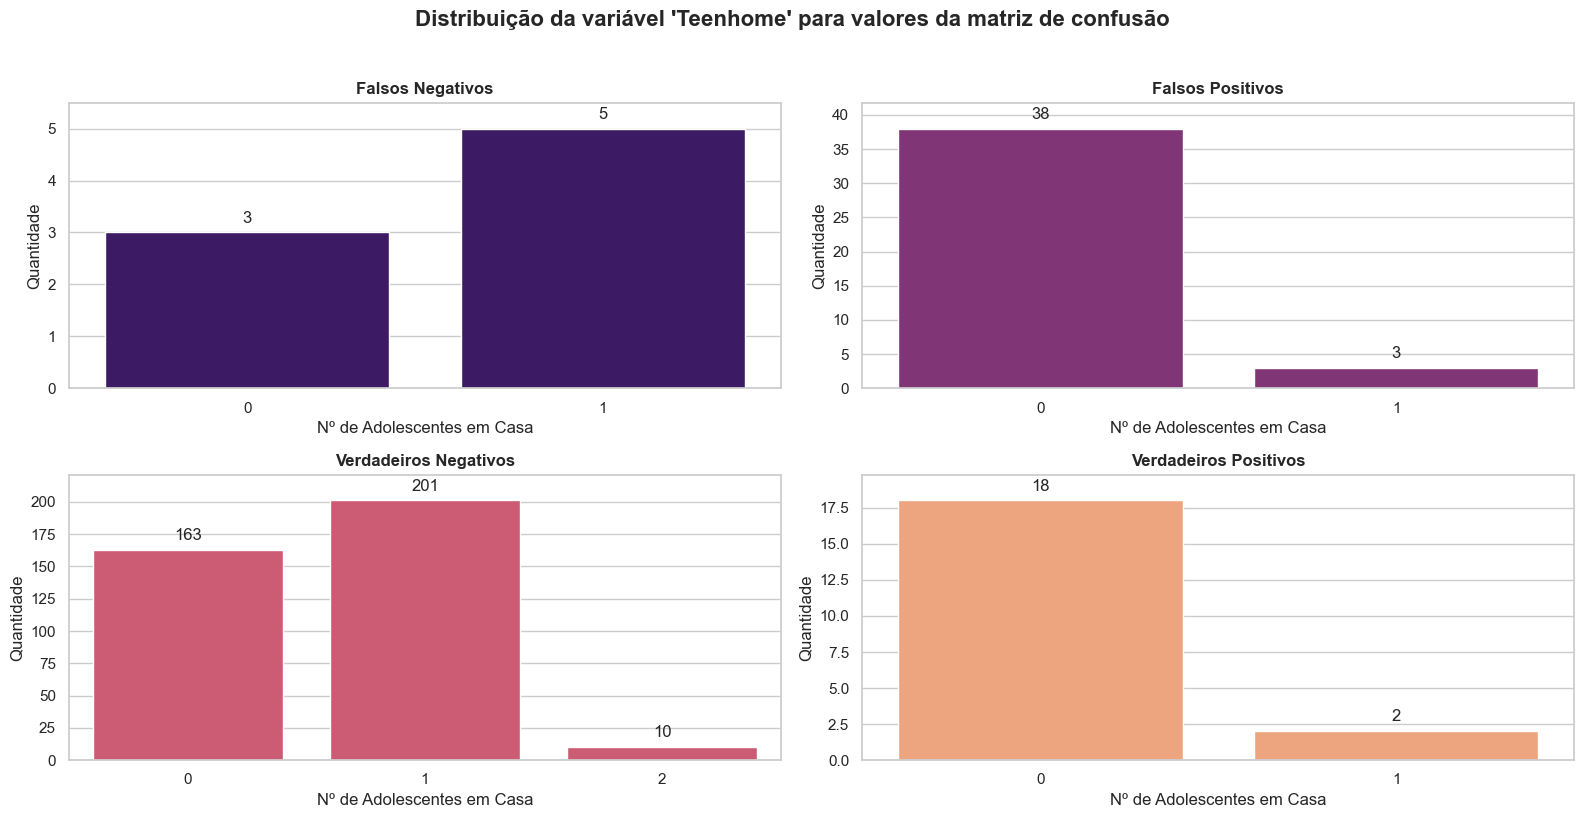

(<Figure size 1600x800 with 4 Axes>,
 array([<Axes: title={'center': 'Falsos Negativos'}, xlabel='Nº de Adolescentes em Casa', ylabel='Quantidade'>,
        <Axes: title={'center': 'Falsos Positivos'}, xlabel='Nº de Adolescentes em Casa', ylabel='Quantidade'>,
        <Axes: title={'center': 'Verdadeiros Negativos'}, xlabel='Nº de Adolescentes em Casa', ylabel='Quantidade'>,
        <Axes: title={'center': 'Verdadeiros Positivos'}, xlabel='Nº de Adolescentes em Casa', ylabel='Quantidade'>],
       dtype=object))

In [47]:
plot_confusion_distributions(
    dfs=dfs,
    x_col="Teenhome",
    x_label="Nº de Adolescentes em Casa",
    suptitle="Distribuição da variável 'Teenhome' para valores da matriz de confusão",
    plot_type="countplot"
)

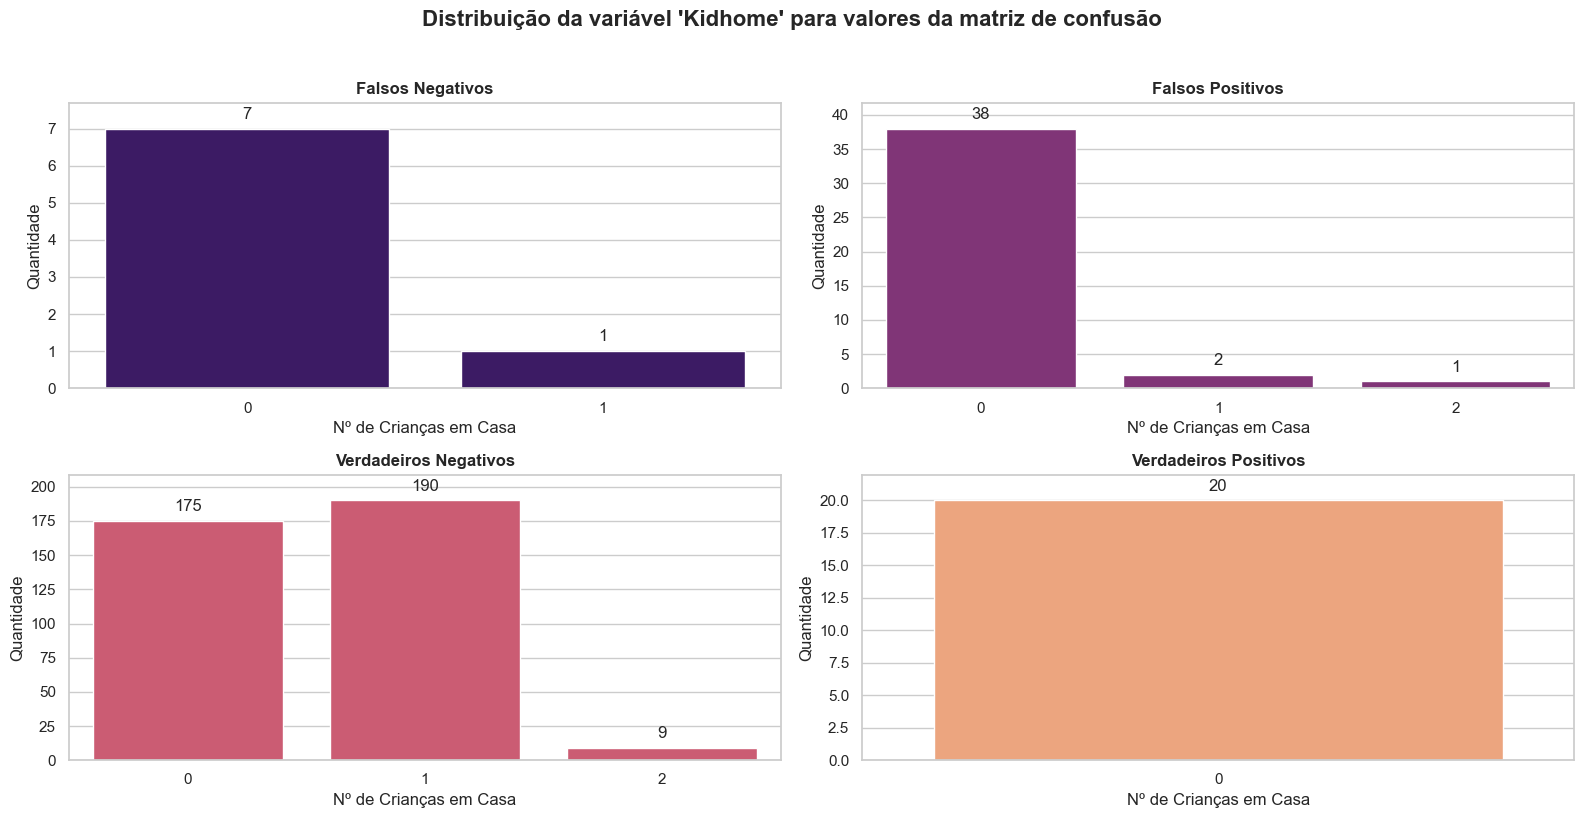

(<Figure size 1600x800 with 4 Axes>,
 array([<Axes: title={'center': 'Falsos Negativos'}, xlabel='Nº de Crianças em Casa', ylabel='Quantidade'>,
        <Axes: title={'center': 'Falsos Positivos'}, xlabel='Nº de Crianças em Casa', ylabel='Quantidade'>,
        <Axes: title={'center': 'Verdadeiros Negativos'}, xlabel='Nº de Crianças em Casa', ylabel='Quantidade'>,
        <Axes: title={'center': 'Verdadeiros Positivos'}, xlabel='Nº de Crianças em Casa', ylabel='Quantidade'>],
       dtype=object))

In [48]:
plot_confusion_distributions(
    dfs=dfs,
    x_col="Kidhome",
    x_label="Nº de Crianças em Casa",
    suptitle="Distribuição da variável 'Kidhome' para valores da matriz de confusão",
    plot_type="countplot"
)

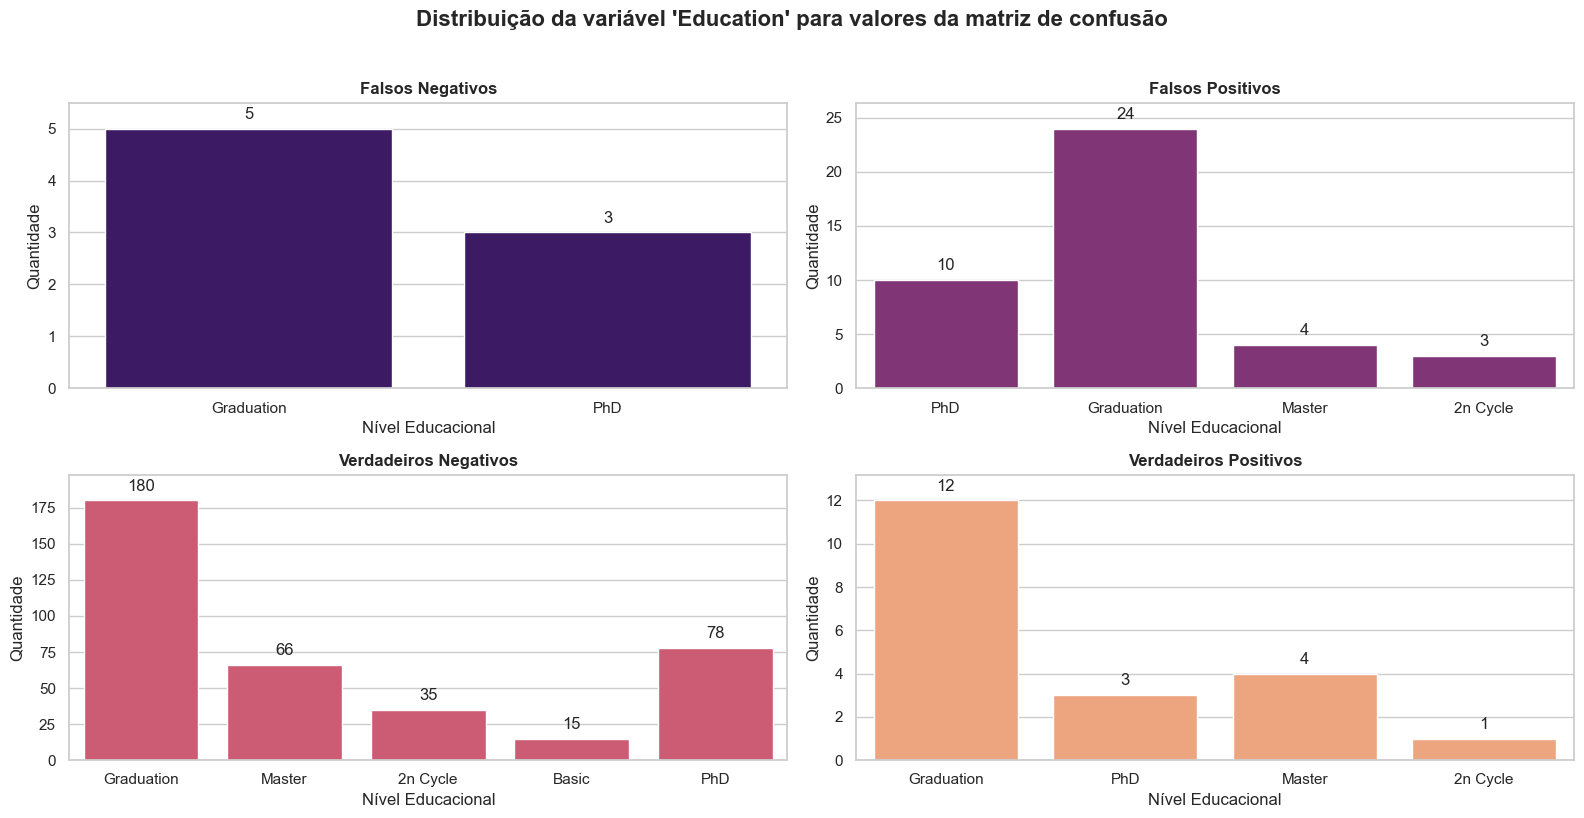

(<Figure size 1600x800 with 4 Axes>,
 array([<Axes: title={'center': 'Falsos Negativos'}, xlabel='Nível Educacional', ylabel='Quantidade'>,
        <Axes: title={'center': 'Falsos Positivos'}, xlabel='Nível Educacional', ylabel='Quantidade'>,
        <Axes: title={'center': 'Verdadeiros Negativos'}, xlabel='Nível Educacional', ylabel='Quantidade'>,
        <Axes: title={'center': 'Verdadeiros Positivos'}, xlabel='Nível Educacional', ylabel='Quantidade'>],
       dtype=object))

In [49]:
education_labels = {
    0: 'Basic',
    1: 'Graduation',
    2: '2n Cycle',
    3: 'Master',
    4: 'PhD'
}

plot_confusion_distributions(
    dfs=dfs,
    x_col="Education",
    x_label="Nível Educacional",
    suptitle="Distribuição da variável 'Education' para valores da matriz de confusão",
    plot_type="countplot",
    map_labels=education_labels
)

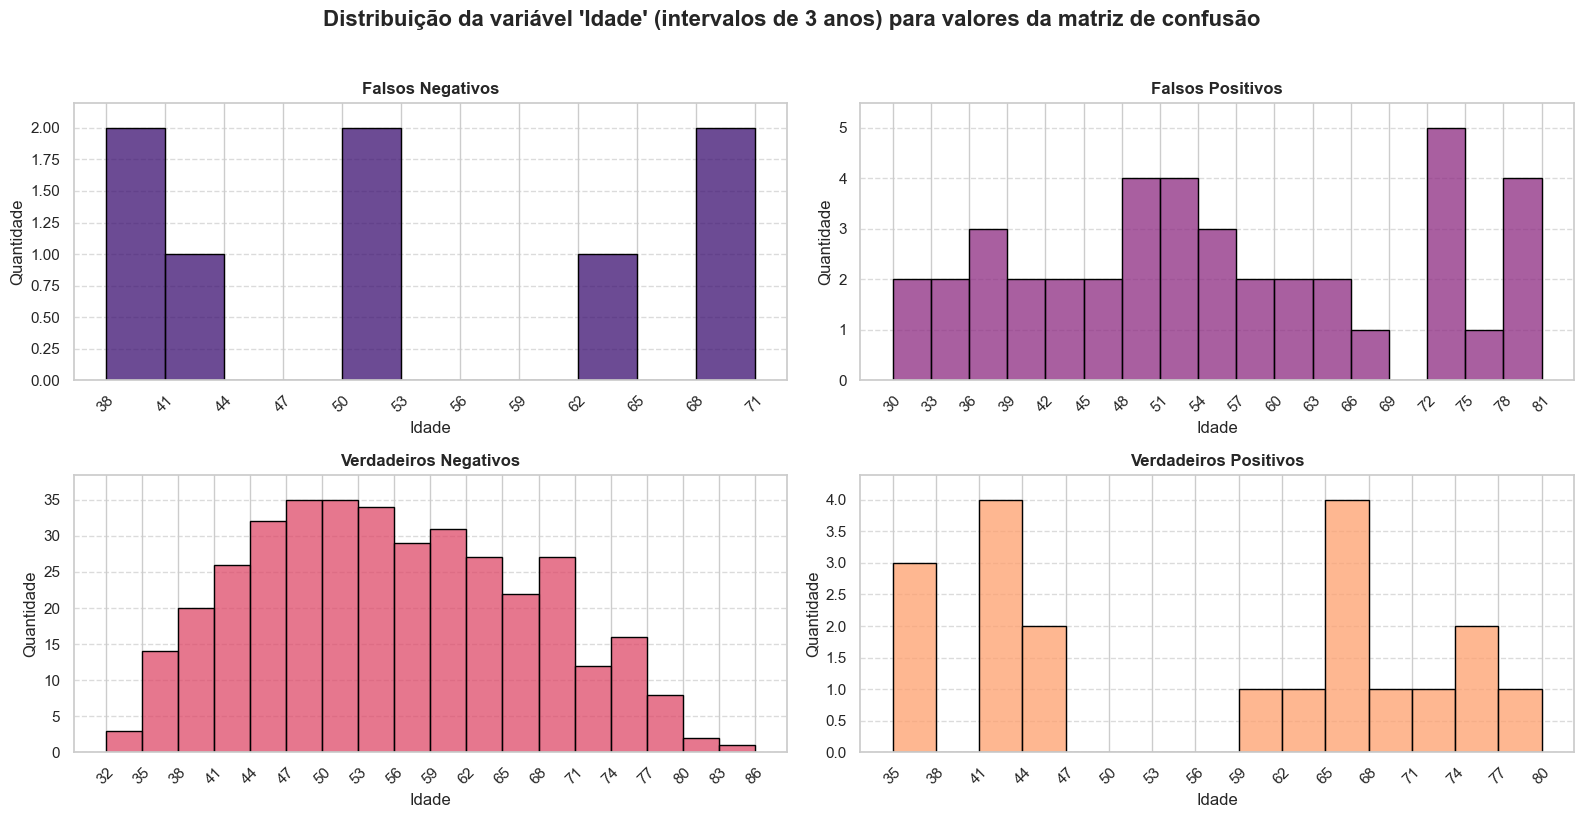

(<Figure size 1600x800 with 4 Axes>,
 array([<Axes: title={'center': 'Falsos Negativos'}, xlabel='Idade', ylabel='Quantidade'>,
        <Axes: title={'center': 'Falsos Positivos'}, xlabel='Idade', ylabel='Quantidade'>,
        <Axes: title={'center': 'Verdadeiros Negativos'}, xlabel='Idade', ylabel='Quantidade'>,
        <Axes: title={'center': 'Verdadeiros Positivos'}, xlabel='Idade', ylabel='Quantidade'>],
       dtype=object))

In [50]:
plot_confusion_distributions(
    dfs=dfs,
    x_col="age",
    x_label="Idade",
    suptitle="Distribuição da variável 'Idade' (intervalos de 3 anos) para valores da matriz de confusão",
    plot_type="histplot",
    bin_size=3
)

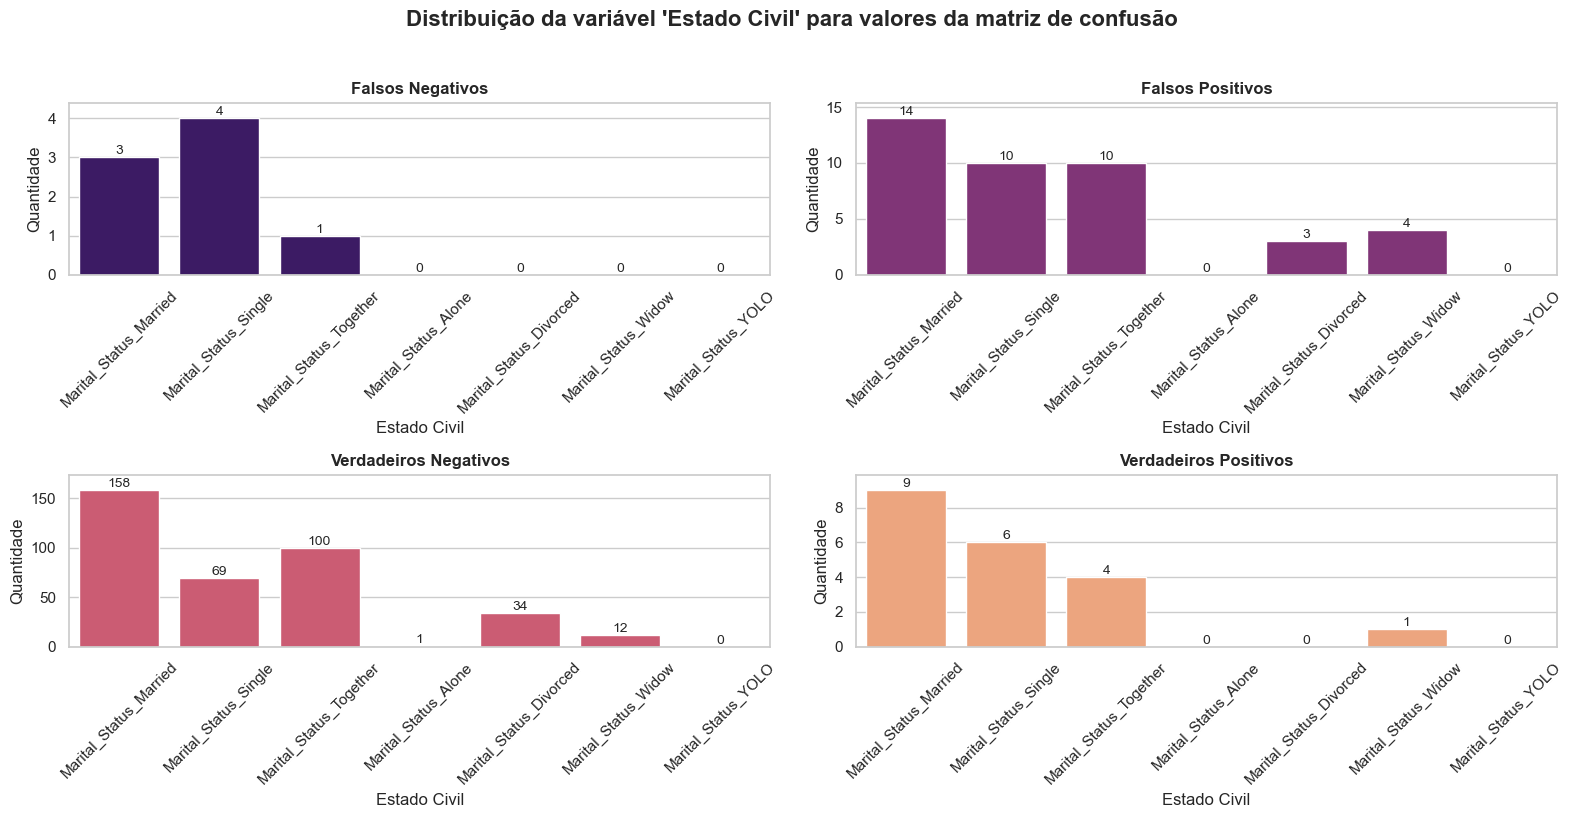

(<Figure size 1600x800 with 4 Axes>,
 array([<Axes: title={'center': 'Falsos Negativos'}, xlabel='Estado Civil', ylabel='Quantidade'>,
        <Axes: title={'center': 'Falsos Positivos'}, xlabel='Estado Civil', ylabel='Quantidade'>,
        <Axes: title={'center': 'Verdadeiros Negativos'}, xlabel='Estado Civil', ylabel='Quantidade'>,
        <Axes: title={'center': 'Verdadeiros Positivos'}, xlabel='Estado Civil', ylabel='Quantidade'>],
       dtype=object))

In [51]:
plot_confusion_distributions(
    dfs=dfs,
    x_col=[
        "Marital_Status_Married", 
        "Marital_Status_Single", 
        "Marital_Status_Together", 
        "Marital_Status_Alone",
        "Marital_Status_Divorced", 
        "Marital_Status_Widow", 
        "Marital_Status_YOLO"
    ],
    x_label="Estado Civil",
    suptitle="Distribuição da variável 'Estado Civil' para valores da matriz de confusão",
    plot_type="bar_dummy"
)

C:\Users\User\AppData\Local\Temp\ipykernel_14360\3890599825.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


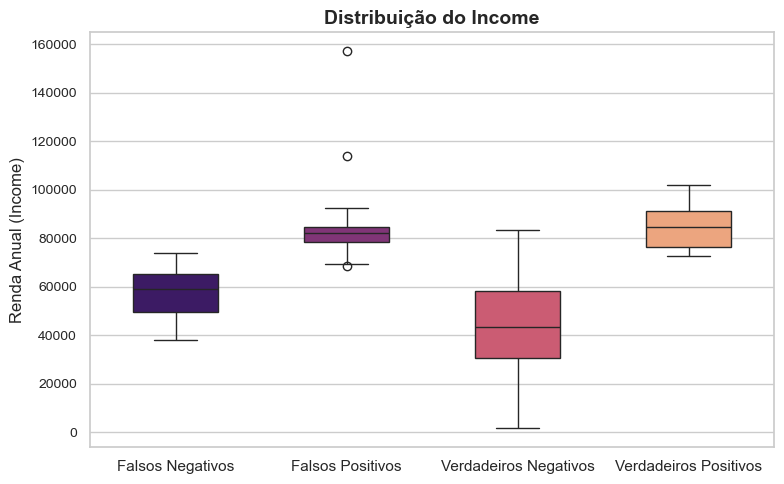

<Axes: title={'center': 'Distribuição do Income'}, ylabel='Renda Anual (Income)'>

In [52]:
plot_box_by_class(
    dfs=dfs,
    value_col="Income",
    title="Distribuição do Income",
    y_label="Renda Anual (Income)",
    palette="magma"
)

## 💡 10. Insights <a id="insights"></a>

Vamos trazer os insights juntamente com os coeficientes, para entender melhor como nosso modelo se comportou.

<table>
  <thead>
    <tr>
      <th>Variável</th>
      <th>Coeficiente</th>
    </tr>
  </thead>
  <tbody>
    <tr><td>Income</td><td>2.131017</td></tr>
    <tr><td>age</td><td>0.034654</td></tr>
    <tr><td>Marital_Status_YOLO</td><td>-0.022637</td></tr>
    <tr><td>Kidhome</td><td>-0.025990</td></tr>
    <tr><td>Marital_Status_Alone</td><td>-0.034380</td></tr>
    <tr><td>Marital_Status_Married</td><td>-0.042508</td></tr>
    <tr><td>Education</td><td>-0.885557</td></tr>
    <tr><td>Marital_Status_Divorced</td><td>-0.335962</td></tr>
    <tr><td>Marital_Status_Widow</td><td>-0.357300</td></tr>
    <tr><td>Teenhome</td><td>-0.389591</td></tr>
    <tr><td>Marital_Status_Together</td><td>-0.423594</td></tr>
    <tr><td>Marital_Status_Single</td><td>-0.617163</td></tr>
  </tbody>
</table>


### Verdadeiros Positivos (VP)

- **Filhos em casa:** Nenhuma criança e, no máximo, 1 adolescente (apenas 2 registros), o que puxa o cálculo para baixo.  
- **Educação:** Maioria com Graduação, alguns com Mestrado ou PhD. A variável `Education` possui coeficiente negativo.  
- **Estado Civil:** Maioria casados (coeficiente negativo, mas não muito baixo) e solteiros. `Marital_Status_Single` é o coeficiente mais negativo, impactando fortemente o cálculo.  
- **Idade:** Distribuição bimodal (35–50 anos e 60–80 anos). Apesar do coeficiente positivo de `age`, seu impacto é pequeno.  
- **Renda:** Maior coeficiente positivo, decisivo na probabilidade. VPs têm renda entre 72 mil e 102 mil, compensando outras variáveis que puxam o cálculo para baixo.

### Verdadeiros Negativos (VN)

- **Filhos em casa:** A maioria tem pelo menos 1 criança ou 1 adolescente, o que reduz significativamente o cálculo.  
- **Educação:** Bem variada; maioria com Graduação, muitos com Mestrado ou PhD, poucos com Ensino Básico.  
- **Estado Civil:** Predominantemente casados, mas muitos solteiros ou em união estável.  
- **Idade:** Distribuição similar aos VPs, mas pouco impacto no coeficiente.  
- **Renda:** Muito baixa (aproximadamente 30 mil a 60 mil), principal fator que impede a compra, mesmo que outros traços sejam parecidos com os VPs.

### Falsos Positivos (FP)

- Perfil muito semelhante aos VPs: poucos filhos, estado civil parecido (casados, solteiros ou união estável), educação majoritariamente Graduação, Mestrado ou PhD.  
- Idade levemente mais distribuída que VPs, mas influência mínima.  
- Renda semelhante aos VPs.  
- **Observação:** Apesar de terem perfil “ideal”, não compraram na realidade; fatores externos podem explicar.

### Falsos Negativos (FN)

- Semelhança com VNs: pelo menos 1 filho ou adolescente em casa.  
- Educação: Graduação ou PhD.  
- Estado Civil: destaque para solteiros, seguido por casados e união estável.  
- Idade: Distribuição bimodal semelhante.  
- Renda: Concentrada entre 37 mil e 74 mil, fator determinante que os impede de ser classificados corretamente como positivos.

**Em suma:**  
- O coeficiente **Income** é o mais determinante no modelo.  
- Variáveis como **Kidhome**, **Teenhome** e **Estado Civil** possuem impacto negativo.  
- A análise mostra que, mesmo perfis semelhantes podem ter resultados diferentes devido a fatores externos ou renda.  

## 🏁 11. Conclusão <a id="conclusao"></a>

Como podemos observar, o modelo não errou por estar “ruim”. Ele errou pois muitos clientes, mesmo possuindo o perfil adequado, decidiram **não comprar na primeira campanha**.  

E isso é completamente natural: estamos lidando com pessoas. As motivações para a compra são imprevisíveis, mesmo que tenhamos conseguido traçar um perfil.
Por isso, não podemos afirmar que todos os clientes com o perfil a seguir comprarão, mas **as chances de comprar na primeia compra aumentam significativamente**.  

O perfil do cliente pode ser definido a partir dos **Verdadeiros Positivos**:

**Perfil Ideal de Cliente:**
<ul>
  <li><strong>Renda Anual:</strong> Entre <em>65 mil e 105 mil</em>.</li>
  <li><strong>Nível Educacional:</strong> Preferencialmente pessoas com apenas graduação.</li>
  <li><strong>Estado Civil:</strong> Preferencialmente casado, mas podem incluir solteiros ou pessoas em união estável (desde que a renda siga o perfil).</li>
  <li><strong>Idade:</strong> Entre 35 e 80 anos.</li>
  <li><strong>Quantidade de filhos em casa:</strong> 0.</li>
</ul>


> **Observação:** Este é o perfil ideal de clientes que compram na primeira campanha, ou seja, aqueles mais preparados para comprar. Isso **não significa** que outros perfis não compram, apenas que podem comprar em outro momento. Esse detalhe é crucial para não gerar a falsa impressão de que clientes fora do perfil não realizam compras.  

O perfil definido deve ser considerado em **estratégias que exigem retorno rápido** ou em estratégias de **growth**, focadas no crescimento acelerado da empresa.

Sabemos que este dataset é fictício. Em um cenário real, seria importante conversar com o time de **Engenharia de Dados** para verificar a disponibilidade de outras variáveis que poderiam enriquecer a análise, como:  

<ul>
  <li><strong>Ocupação:</strong> Observamos que, quanto maior o nível educacional, menor a chance de compra, o que é contra-intuitivo. Normalmente, maior formação está associada a maior salário. A variável de ocupação ajudaria a entender melhor esse comportamento.</li>
  <li><strong>Gênero:</strong> Essencial para compreender o perfil do cliente ideal. Por exemplo, se o produto fosse destinado exclusivamente ao gênero feminino, clientes do gênero masculino, mesmo dentro do perfil, não comprariam.</li>
  <li><strong>Localização Geográfica/Endereço:</strong> Importante para definir onde concentrar esforços, e também para avaliar a relevância de campanhas online ou offline.</li>
</ul>

Essas variáveis poderiam **alterar completamente os resultados da análise**. Embora possamos incluir muitas outras, estas já ajudam a entender que algumas informações e contexto adicionais seriam fundamentais para análises mais precisas.
